## Base: Resultados de Análisis de Laboratorio Suelos en Colombia

Resultados del Servicio de Análisis de Suelos que el Laboratorio de Química y Física de Suelos de AGROSAVIA, presta al sector agropecuario, se enfoca en la EVALUACIÓN de la Fertilidad del Suelo, de la Salinidad y parámetros que Sirven como herramienta para la realización de planes de fertilización, Aplicación de enmiendas y adecuación de los terrenos para lograr producciones rentables.

Metadata: https://www.datos.gov.co/Agricultura-y-Desarrollo-Rural/Resultados-de-An-lisis-de-Laboratorio-Suelos-en-Co/ch4u-f3i5/about_data

Api: https://www.datos.gov.co/api/v3/views/ch4u-f3i5/query.json

In [1]:
import pandas as pd
import numpy as np
from sodapy import Socrata
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# codigo de cargue tomado de "https://dev.socrata.com/foundry/www.datos.gov.co/ch4u-f3i5" que es la documentación de la API  

# Unauthenticated client only works with public data sets. Note 'None'
# in place of application token, and no username or password:
client = Socrata("www.datos.gov.co", None)

# First 20000 results, returned as JSON from API / converted to Python list of
# dictionaries by sodapy.
results = client.get("ch4u-f3i5", limit=95000)

# Convert to pandas DataFrame
results_df = pd.DataFrame.from_records(results)

In [3]:
results_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92738 entries, 0 to 92737
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   secuencial                          92738 non-null  object
 1   fecha_de_an_lisis                   92738 non-null  object
 2   departamento                        92738 non-null  object
 3   municipio                           92736 non-null  object
 4   cultivo                             92738 non-null  object
 5   estado                              92738 non-null  object
 6   tiempo_de_establecimiento           92738 non-null  object
 7   topografia                          92738 non-null  object
 8   drenaje                             92738 non-null  object
 9   riego                               92738 non-null  object
 10  fertilizantes_aplicados             92738 non-null  object
 11  ph_agua_suelo                       92738 non-null  ob

In [4]:
# nos quedamos con el cultivo objetivo del estudio
results_df_cafe=results_df[results_df['cultivo']=='Café']
results_df_cafe.shape

(5080, 32)

### verificar valores nulos

In [5]:
# se identifican que los valores ND son valores no disponibles por lo tanto se toman como valores nulos
results_df_cafe = results_df_cafe.replace('ND', np.nan)
results_df_cafe

,secuencial,fecha_de_an_lisis,departamento,municipio,cultivo,estado,tiempo_de_establecimiento,topografia,drenaje,riego,...,conductividad_electrica,hierro_disponible_olsen,cobre_disponible,manganeso_disponible_olsen,zinc_disponible_olsen,boro_disponible,hierro_disponible_doble_acido,cobre_disponible_doble_acido,manganeso_disponible_doble_acido,zinc_disponible_doble_acido
2,3,22/08/2014,ANTIOQUIA,LIBORINA,Café,Por establecer,No indica,Pendiente,Mal drenaje,No Tiene,...,0.328,390,11.10,8.299,5,0.085,NaN,NaN,NaN,NaN
4,5,22/08/2014,ANTIOQUIA,LIBORINA,Café,Por establecer,No indica,Ondulado,Mal drenaje,No Tiene,...,0.323,117.9,3.8,4.600,0.700,0.139,NaN,NaN,NaN,NaN
5,6,22/08/2014,ANTIOQUIA,LIBORINA,Café,Por establecer,No indica,Pendiente,Mal drenaje,No Tiene,...,0.621,60.19,3.5,4.3,4.8,0.355,NaN,NaN,NaN,NaN
6,7,22/08/2014,ANTIOQUIA,LIBORINA,Café,Por establecer,No indica,Pendiente,Mal drenaje,No Tiene,...,0.184,330,5.5,6.4,1.400,0.175,NaN,NaN,NaN,NaN
8,9,22/08/2014,ANTIOQUIA,LIBORINA,Café,Por establecer,No indica,Ondulado,Mal drenaje,No Tiene,...,0.159,40.4,4.099,3.8,0.6,0.139,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92712,92713,1/04/2025,HUILA,PITALITO,Café,Por establecer,De 0 a 1 año,No indica,No indica,No indica,...,0.86,185.40,5.50,23.57,6.13,0.64,NaN,NaN,NaN,NaN
92713,92714,31/03/2025,HUILA,PITALITO,Café,Por establecer,De 0 a 1 año,No indica,No indica,No indica,...,0.79,168.35,5.75,38.68,10.78,1.10,NaN,NaN,NaN,NaN
92714,92715,2/04/2025,HUILA,PITALITO,Café,Por establecer,De 0 a 1 año,No indica,No indica,No indica,...,0.74,177.36,3.11,45.28,6.85,0.88,NaN,NaN,NaN,NaN
92725,92726,4/04/2025,CUNDINAMARCA,NOCAIMA,Café,ESTABLECIDO,de 1 a 5 años,Pendiente moderada,Buen drenaje,No indica,...,0.24,749.59,4.65,6.55,6.36,0.33,NaN,NaN,NaN,NaN


In [6]:
results_df_cafe.drop(['hierro_disponible_doble_acido', 'cobre_disponible_doble_acido',
                      'manganeso_disponible_doble_acido','zinc_disponible_doble_acido'], axis=1, inplace=True)
results_df_cafe=results_df_cafe.dropna(subset=['municipio'])

Las variables de hierro, cobre, manganeso y zin soble acido no presentan información por lo tanto se eliminan las columnas, asi mismo hay dos filas que no presentan información de municipio desde la captura de los datos, estos tambien se eliminan debido a que el divipola es una llave principal para cruce con la información extra del estudio.

Por otro lado los valores nulos de las demás variables numericas se reemplazan con cero siignificando al ausencia de esa medición en ese cultivo.

#### Arreglar formato de columnas

In [7]:
# arreglo formato fecha
results_df_cafe['fecha_de_an_lisis']=pd.to_datetime(results_df_cafe['fecha_de_an_lisis'],format='%d/%m/%Y')
results_df_cafe['año_de_an_lisis']=results_df_cafe['fecha_de_an_lisis'].dt.year
results_df_cafe['mes_de_an_lisis']=results_df_cafe['fecha_de_an_lisis'].dt.month
results_df_cafe['fecha_de_an_lisis'].head()

C:\Users\vhmen\AppData\Local\Temp\ipykernel_7392\1867481610.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_cafe['fecha_de_an_lisis']=pd.to_datetime(results_df_cafe['fecha_de_an_lisis'],format='%d/%m/%Y')
C:\Users\vhmen\AppData\Local\Temp\ipykernel_7392\1867481610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_df_cafe['año_de_an_lisis']=results_df_cafe['fecha_de_an_lisis'].dt.year
C:\Users\vhmen\AppData\Local\Temp\ipykernel_7392\1867481610.py:4: SettingWithCopyWarning: 
A value i

2   2014-08-22
4   2014-08-22
5   2014-08-22
6   2014-08-22
8   2014-08-22
Name: fecha_de_an_lisis, dtype: datetime64[ns]

In [8]:
# nos quedamos con los registros entre el 2015 y el 2023 que son objeto de estudio
results_df_cafe=results_df_cafe[(results_df_cafe['fecha_de_an_lisis']>='2015-01-01') & (results_df_cafe['fecha_de_an_lisis']<='2023-12-31')]
results_df_cafe.shape

(4331, 30)

In [9]:
# variables numericas
results_df_cafe['ph_agua_suelo'] = results_df_cafe['ph_agua_suelo'].astype(float)
results_df_cafe['materia_organica'] = results_df_cafe['materia_organica'].astype(float)
results_df_cafe['fosforo_bray_ii'] = results_df_cafe['fosforo_bray_ii'].str.replace('[<>]', '', regex=True)
results_df_cafe['fosforo_bray_ii'] = results_df_cafe['fosforo_bray_ii'].astype(float)
results_df_cafe['azufre_fosfato_monocalcico'] = results_df_cafe['azufre_fosfato_monocalcico'].astype(float)
results_df_cafe['acidez_kcl'] = results_df_cafe['acidez_kcl'].str.replace('[<>]', '', regex=True)
results_df_cafe['acidez_kcl'] = results_df_cafe['acidez_kcl'].astype(float)
results_df_cafe['aluminio_intercambiable'] = results_df_cafe['aluminio_intercambiable'].astype(float)
results_df_cafe['calcio_intercambiable'] = results_df_cafe['calcio_intercambiable'].str.replace('[<>]', '', regex=True)
results_df_cafe['calcio_intercambiable'] = results_df_cafe['calcio_intercambiable'].astype(float)
results_df_cafe['magnesio_intercambiable'] = results_df_cafe['magnesio_intercambiable'].str.replace('[<>]', '', regex=True)
results_df_cafe['magnesio_intercambiable'] = results_df_cafe['magnesio_intercambiable'].astype(float)
results_df_cafe['potasio_intercambiable'] = results_df_cafe['potasio_intercambiable'].str.replace('[<>]', '', regex=True)
results_df_cafe['potasio_intercambiable'] = results_df_cafe['potasio_intercambiable'].astype(float)
results_df_cafe['sodio_intercambiable'] = results_df_cafe['sodio_intercambiable'].str.replace('[<>]', '', regex=True)
results_df_cafe['sodio_intercambiable'] = results_df_cafe['sodio_intercambiable'].astype(float)
results_df_cafe['capacidad_de_intercambio_cationico'] = results_df_cafe['capacidad_de_intercambio_cationico'].astype(float)
results_df_cafe['conductividad_electrica'] = results_df_cafe['conductividad_electrica'].astype(float)
results_df_cafe['hierro_disponible_olsen'] = results_df_cafe['hierro_disponible_olsen'].str.replace('[<>]', '', regex=True)
results_df_cafe['hierro_disponible_olsen'] = results_df_cafe['hierro_disponible_olsen'].astype(float)
results_df_cafe['cobre_disponible'] = results_df_cafe['cobre_disponible'].str.replace('[<>]', '', regex=True)
results_df_cafe['cobre_disponible'] = results_df_cafe['cobre_disponible'].astype(float)
results_df_cafe['manganeso_disponible_olsen'] = results_df_cafe['manganeso_disponible_olsen'].str.replace('[<>]', '', regex=True)
results_df_cafe['manganeso_disponible_olsen'] = results_df_cafe['manganeso_disponible_olsen'].astype(float)
results_df_cafe['zinc_disponible_olsen'] = results_df_cafe['zinc_disponible_olsen'].str.replace('[<>]', '', regex=True)
results_df_cafe['zinc_disponible_olsen'] = results_df_cafe['zinc_disponible_olsen'].astype(float)
results_df_cafe['boro_disponible'] = results_df_cafe['boro_disponible'].str.replace('[<>]', '', regex=True)
results_df_cafe['boro_disponible'] = results_df_cafe['boro_disponible'].astype(float)

#### Arreglo Divipola

In [10]:
results_df_cafe['departamento'].value_counts()
# dado que el proyecto se realizará para los departamentos de Cundinamarca y nariño se seleccionan estos
# dos departamentos y se complementa cruzando con la base divipola del dane para añadir el codigo y tener un cruce
# ajustado con las otras fuentes de información 
results_df_cafe=results_df_cafe[(results_df_cafe['departamento']=='CUNDINAMARCA') | (results_df_cafe['departamento']=='NARIÑO')]
results_df_cafe.shape

(2561, 30)

In [11]:
#cargar base divipola
divipola=pd.read_excel('DIVIPOLA_Municipios.xlsx'
                       , sheet_name='Municipios',nrows=1123, skiprows=10)
divipola = divipola.rename(columns={divipola.columns[0]: 'Código_departamento',divipola.columns[1]: 'departamento',
                       divipola.columns[2]: 'divipola',divipola.columns[3]: 'municipio'})
divipola=divipola.loc[(divipola['departamento']=='CUNDINAMARCA')|(divipola['departamento']=='NARIÑO'),['departamento','divipola','municipio']]
divipola

,departamento,divipola,municipio
458,CUNDINAMARCA,25001,AGUA DE DIOS
459,CUNDINAMARCA,25019,ALBÁN
460,CUNDINAMARCA,25035,ANAPOIMA
461,CUNDINAMARCA,25040,ANOLAIMA
462,CUNDINAMARCA,25053,ARBELÁEZ
...,...,...,...
775,NARIÑO,52786,TAMINANGO
776,NARIÑO,52788,TANGUA
777,NARIÑO,52835,SAN ANDRÉS DE TUMACO
778,NARIÑO,52838,TÚQUERRES


In [12]:
results_df_cafe=pd.merge(results_df_cafe,divipola, on=['departamento','municipio'], how='left')
results_df_cafe['divipola'] = results_df_cafe['divipola'].astype('Int64')
results_df_cafe.shape

(2561, 31)

In [13]:
results_df_cafe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 31 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   secuencial                          2561 non-null   object        
 1   fecha_de_an_lisis                   2561 non-null   datetime64[ns]
 2   departamento                        2561 non-null   object        
 3   municipio                           2561 non-null   object        
 4   cultivo                             2561 non-null   object        
 5   estado                              2561 non-null   object        
 6   tiempo_de_establecimiento           2561 non-null   object        
 7   topografia                          2561 non-null   object        
 8   drenaje                             2561 non-null   object        
 9   riego                               2561 non-null   object        
 10  fertilizantes_aplicados 

#### Evaluación de duplicados

In [14]:
results_df_cafe['secuencial'].duplicated().value_counts()

secuencial
False    2561
Name: count, dtype: int64

La base no presenta duplicados por la columa secuencial, sin embargo, no se puede determinar la granuralidad de la base de datos, dado que en la pagina no se especifica a que hace referencia cada registro, se intuye que es del cultivo analizado pero no se puede determinar si a ese mismo cultivo se le realiza el estudio de forma periodica, por lo tanto por fecha pueden haber duplicados que no se pueden identificar, a menos que sea un estudio de laboratorio unico por cultivo independientemente de la fecha, es necesario confirmar esta definición por solicitud con la fuente de datos

### Exploratory data analysis

In [15]:
columnas_numericas = results_df_cafe.select_dtypes(include=[np.number]).columns.tolist()
columnas_numericas=columnas_numericas[:-3] # quitamos el año, mes y divipola
print("Numeric columns:", columnas_numericas)

Numeric columns: ['ph_agua_suelo', 'materia_organica', 'fosforo_bray_ii', 'azufre_fosfato_monocalcico', 'acidez_kcl', 'aluminio_intercambiable', 'calcio_intercambiable', 'magnesio_intercambiable', 'potasio_intercambiable', 'sodio_intercambiable', 'capacidad_de_intercambio_cationico', 'conductividad_electrica', 'hierro_disponible_olsen', 'cobre_disponible', 'manganeso_disponible_olsen', 'zinc_disponible_olsen', 'boro_disponible']


In [16]:
print("=== Estadisticos descriptivas ===")
Estadisticas_desc = results_df_cafe[columnas_numericas].describe()
print(Estadisticas_desc)

=== Estadisticos descriptivas ===
       ph_agua_suelo  materia_organica  fosforo_bray_ii  \
count    2561.000000       2561.000000      2528.000000   
mean        5.463291          5.606005        20.372847   
std         0.676972          4.290011        46.285526   
min         3.980000          0.070000         0.661000   
25%         4.940000          2.880000         4.483000   
50%         5.430000          4.210000         8.785000   
75%         5.860000          6.840000        19.405000   
max         8.140000         51.900000      1464.000000   

       azufre_fosfato_monocalcico   acidez_kcl  aluminio_intercambiable  \
count                 2542.000000  1378.000000               1378.00000   
mean                     6.684510     2.773020                  2.25228   
std                      6.429437     2.313093                  2.04001   
min                      0.219000     0.000000                  0.00000   
25%                      3.690000     0.967250             

In [19]:
# dado que no hay valores negativos, para las variables numericas se propone reemplazar los valores vacios con cero, lo cual representa la uacencia de su medicion
results_df_cafe[columnas_numericas] = results_df_cafe[columnas_numericas].fillna(0)

In [20]:
print("\n=== Estadisticas adicionales ===")
Estadisticas_adds = results_df_cafe[columnas_numericas].agg(['skew', 'kurtosis']).round(3)
print(Estadisticas_adds)


=== Estadisticas adicionales ===
          ph_agua_suelo  materia_organica  fosforo_bray_ii  \
skew              0.562             2.260           14.715   
kurtosis          0.416             8.795          392.117   

          azufre_fosfato_monocalcico  acidez_kcl  aluminio_intercambiable  \
skew                          10.150       1.859                    1.917   
kurtosis                     183.026       3.632                    3.687   

          calcio_intercambiable  magnesio_intercambiable  \
skew                      2.693                    2.834   
kurtosis                 12.226                   12.914   

          potasio_intercambiable  sodio_intercambiable  \
skew                       4.348                 7.202   
kurtosis                  37.866               133.892   

          capacidad_de_intercambio_cationico  conductividad_electrica  \
skew                                   2.514                    4.778   
kurtosis                              10.332 

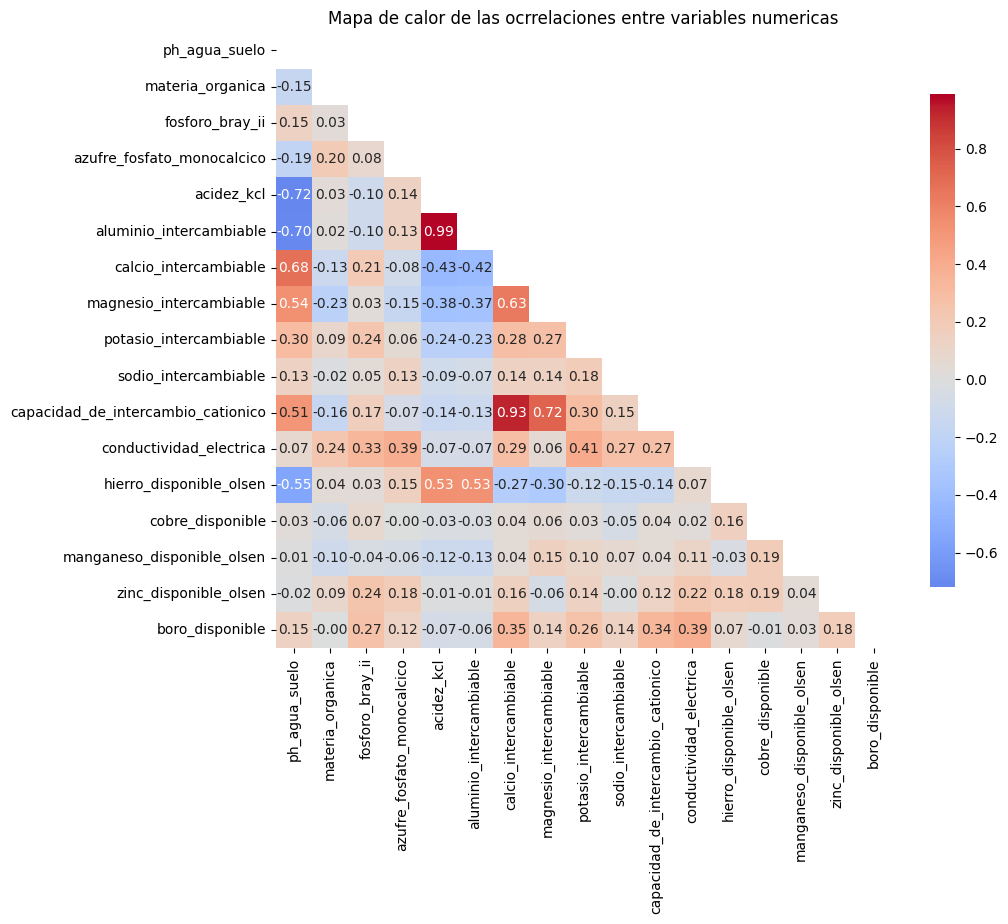

In [21]:
plt.figure(figsize=(10, 8))
corr_matriz = results_df_cafe[columnas_numericas].corr()
mask = np.triu(np.ones_like(corr_matriz, dtype=bool))
        
sns.heatmap(corr_matriz, mask=mask,annot=True, cmap='coolwarm', center=0,square=True,fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Mapa de calor de las ocrrelaciones entre variables numericas')
#plt.tight_layout()
plt.show()

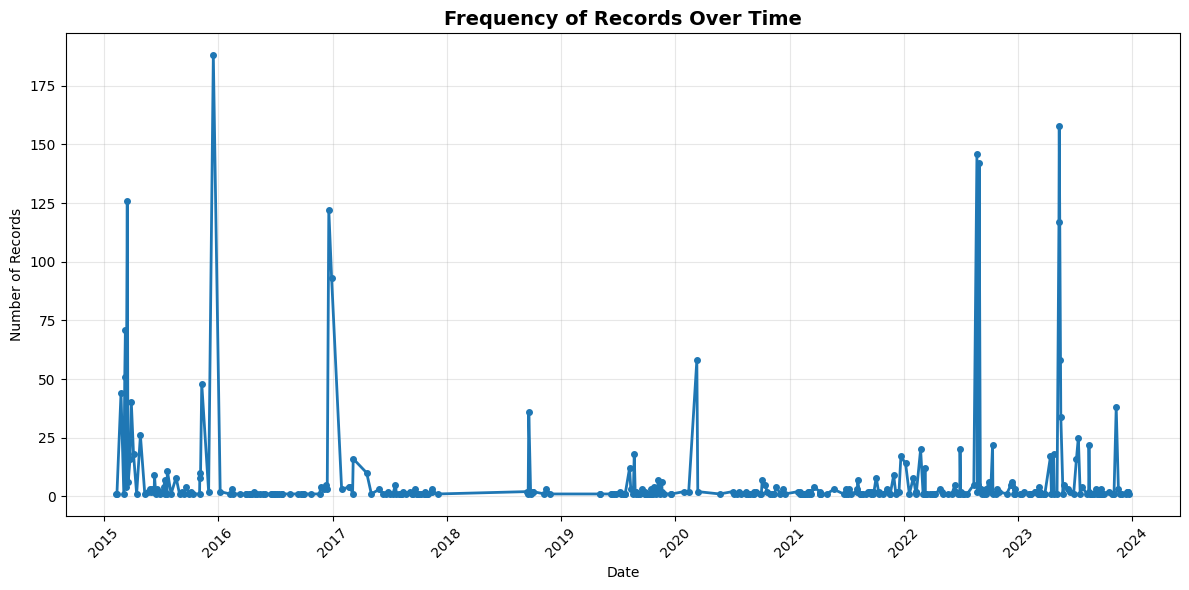

In [22]:
Conteos_fecha = results_df_cafe['fecha_de_an_lisis'].value_counts().sort_index()

# Create line plot
plt.figure(figsize=(12, 6))
plt.plot(Conteos_fecha.index, Conteos_fecha.values, marker='o', linewidth=2, markersize=4)
plt.title('Frequency of Records Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Number of Records')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [23]:
results_df_cafe['cultivo'].value_counts(dropna=False)      

cultivo
Café    2561
Name: count, dtype: int64

In [24]:
results_df_cafe['estado'].value_counts(dropna=False)      

estado
ESTABLECIDO       1043
Establecido       1032
Por establecer     346
No indica          140
Name: count, dtype: int64

In [25]:
results_df_cafe['tiempo_de_establecimiento'].value_counts(dropna=False)        

tiempo_de_establecimiento
De 0 a 1 año      958
De 1 a 5 años     572
de 1 a 5 años     288
No indica         265
de 5 a 10 años    224
De 5 a 10 años    160
mas de 10 años     55
Mas de 10 años     39
Name: count, dtype: int64

In [26]:
results_df_cafe['topografia'].value_counts(dropna=False)          

topografia
Pendiente moderada        616
Pendiente                 487
Ondulado                  453
Moderadamente ondulado    344
Plano                     145
No indica                 131
Ondulado y Pendiente      122
Pendiente fuerte          104
Pendiente leve             73
Ligeramente ondulado       65
Plano y pendiente          11
Plano y ondulado            8
Fuertemente ondulado        2
Name: count, dtype: int64

In [27]:
results_df_cafe['drenaje'].value_counts(dropna=False)              

drenaje
Buen drenaje        1795
Regular drenaje      585
No indica            136
Mal drenaje           44
Muy buen drenaje       1
Name: count, dtype: int64

In [28]:
results_df_cafe['riego'].value_counts(dropna=False)             

riego
No Tiene                1393
No Indica                742
No indica                350
Aspersión                 61
Aspersión - Manguera       9
Manguera                   3
Aspersión - Goteo          2
Goteo                      1
Name: count, dtype: int64

In [29]:
results_df_cafe['fertilizantes_aplicados'].value_counts(dropna=False)

fertilizantes_aplicados
No indica              1291
SI                      123
Ninguno                 104
NO                       68
17-6-18-2                62
                       ... 
DAP POTASIO UREA          1
26-6-18 PRODUCCION        1
LEVANTE+ORGANICO          1
PRDUCCION                 1
PRODUCCION CAFETERA       1
Name: count, Length: 517, dtype: int64

#### Sacar base final
Para el estudio se seleccionan las variables: Topografia, Drenaje, acidez, ph del agua-suelo, conductividad electrica, capacidad de intercambio, materia organica y la disponibilidad de los elementos de cobre, hierro, zinc, boro y manganeso. Estas variables pueden resumir de forma completa la información total sobre el cultivo analizado manteniendo la disponibilidad de los elementos y las caracteristicas del terreno.


In [32]:
def get_mode(series):
    modes = series.mode()
    return modes.iloc[0] if not modes.empty else None
    
results_df_cafe_agg = results_df_cafe.groupby(['año_de_an_lisis', 'mes_de_an_lisis','divipola']).agg(
    departamento=('departamento', 'max'),
    municipio=('municipio', 'max'),
    topografia=('topografia', get_mode),
    drenaje=('drenaje', get_mode),
    cobre_disponible=('cobre_disponible', 'mean'),
    hierro_disponible_olsen=('hierro_disponible_olsen', 'mean'),
    zinc_disponible_olsen=('zinc_disponible_olsen', 'mean'),
    boro_disponible=('boro_disponible', 'mean'),
    manganeso_disponible_olsen=('manganeso_disponible_olsen', 'mean'),
    acidez_kcl=('acidez_kcl', 'mean'),
    ph_agua_suelo=('ph_agua_suelo', 'mean'),
    conductividad_electrica=('conductividad_electrica', 'mean'),
    capacidad_de_intercambio_cationico=('capacidad_de_intercambio_cationico', 'mean'),
    materia_organica=('materia_organica', 'mean'),
    Numero_cultivos_Cafe=('departamento', 'count')  # Count any column
).reset_index()

In [33]:
results_df_cafe_agg.head(n=5)

,año_de_an_lisis,mes_de_an_lisis,divipola,departamento,municipio,topografia,drenaje,cobre_disponible,hierro_disponible_olsen,zinc_disponible_olsen,boro_disponible,manganeso_disponible_olsen,acidez_kcl,ph_agua_suelo,conductividad_electrica,capacidad_de_intercambio_cationico,materia_organica,Numero_cultivos_Cafe
0,2015,2,25095,CUNDINAMARCA,BITUIMA,Ligeramente ondulado,Buen drenaje,2.90000,267.000000,6.300000,0.197000,5.300000,0.0000,5.540000,0.21100,8.224000,4.789000,1
1,2015,2,25506,CUNDINAMARCA,VENECIA,Ondulado,Buen drenaje,2.93725,388.915833,5.054125,0.225167,6.528542,0.5985,5.457917,0.24725,8.019417,10.865542,24
2,2015,2,25524,CUNDINAMARCA,PANDI,Pendiente,Buen drenaje,3.10500,387.465000,5.659950,0.218600,7.074750,0.5291,5.358950,0.24065,6.368150,9.496500,20
3,2015,2,25718,CUNDINAMARCA,SASAIMA,Ondulado,Buen drenaje,3.30000,394.000000,1.100000,0.090000,3.300000,2.8260,4.769000,0.26900,4.776000,10.330000,1
4,2015,3,25095,CUNDINAMARCA,BITUIMA,Pendiente,Buen drenaje,1.98995,160.155000,5.379400,0.247650,5.169300,2.0362,5.626850,0.30910,10.951000,4.528900,20


In [34]:
results_df_cafe_agg.to_excel('Base_AnalisisLabSuelo_municipio_mes_V3.xlsx', sheet_name='Base', index=False)